In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
from scipy import fft

In [2]:
from scipy import signal

(-2.0, 2.0)

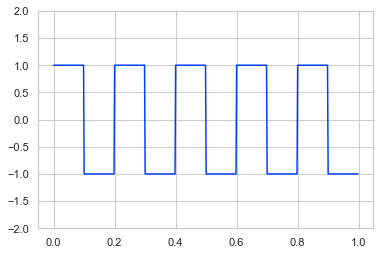

In [3]:
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 500, endpoint=False)
plt.plot(t, signal.square(2 * np.pi * 5 * t))
plt.ylim(-2, 2)

In [4]:
signal_1 = pd.DataFrame(zip(t,signal.square(2 * np.pi * 5 * t)),columns=['Time','Value'])

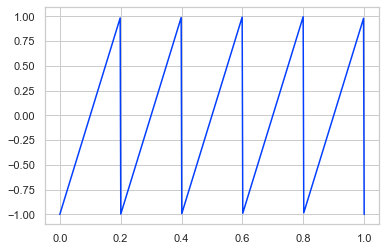

In [5]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 500)
plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))

In [6]:
signal_2 = pd.DataFrame(zip(t,signal.sawtooth(2 * np.pi * 5 * t)),columns=['Time','Value'])

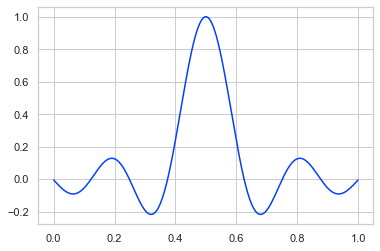

In [7]:
x = np.linspace(-12.5, 12.5, 500)
t = np.linspace(0, 1, 500)
y = np.sinc(x/np.pi)
plt.plot(t,y)

In [8]:
signal_3 = pd.DataFrame(zip(t,y),columns=['Time','Value'])

In [9]:
def GMM_fit(df):
    dfx = df
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 50)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(dfx)
            bic.append(gmm.bic(dfx))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    return best_gmm

In [10]:
best_gmm1 = GMM_fit(signal_1)
best_gmm2 = GMM_fit(signal_2)
best_gmm3 = GMM_fit(signal_3)

In [11]:
best_gmm1

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [12]:
best_gmm1.means_

array([[ 0.649     ,  1.        ],
       [ 0.549     , -1.        ],
       [ 0.04900003,  1.        ],
       [ 0.749     , -1.        ],
       [ 0.14900003, -1.        ],
       [ 0.84899997,  1.        ],
       [ 0.94899997, -1.        ],
       [ 0.449     ,  1.        ],
       [ 0.249     ,  1.        ],
       [ 0.349     , -1.        ]])

In [13]:
best_gmm1.weights_

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [14]:
z1,_ = best_gmm1.sample(500)

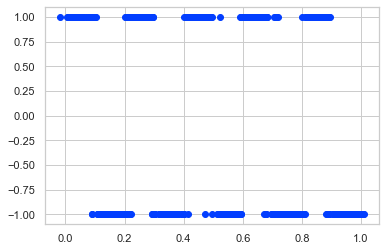

In [15]:
plt.scatter(z1[:,0],z1[:,1])

In [16]:
best_gmm2

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=23, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [17]:
best_gmm2.means_

array([[ 0.10424971,  0.04249715],
       [ 0.61952726, -0.80472742],
       [ 0.73234849,  0.3234849 ],
       [ 0.47699377, -0.23006234],
       [ 0.37349463,  0.73494627],
       [ 0.22789311, -0.72106892],
       [ 0.68600799, -0.13992014],
       [ 0.8337672 , -0.66232799],
       [ 0.93702786,  0.37027865],
       [ 0.13911351,  0.39113513],
       [ 0.06586527, -0.34134735],
       [ 0.52457735,  0.2457735 ],
       [ 0.42754066, -0.72459345],
       [ 1.        , -1.        ],
       [ 0.89255141, -0.07448587],
       [ 0.02447108, -0.75528921],
       [ 0.32711784,  0.27117842],
       [ 0.63569888, -0.64301117],
       [ 0.27918884, -0.20811162],
       [ 0.57294096,  0.72940958],
       [ 0.1748854 ,  0.74885395],
       [ 0.97422536,  0.74225364],
       [ 0.77533502,  0.75335023]])

In [18]:
z2,_ = best_gmm2.sample(500)

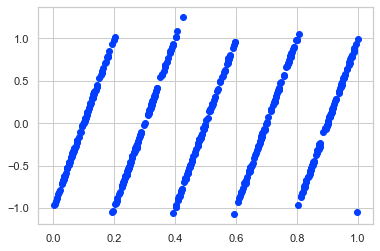

In [26]:
plt.scatter(z2[:,0],z2[:,1])

In [20]:
best_gmm3

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=28, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [21]:
best_gmm3.means_

array([[ 0.69213377, -0.20524884],
       [ 0.48407324,  0.9712327 ],
       [ 0.129729  ,  0.01876133],
       [ 0.820482  ,  0.12134422],
       [ 0.58268436,  0.42488884],
       [ 0.3061175 , -0.20241785],
       [ 0.49921572,  0.99839777],
       [ 0.36487581, -0.06555325],
       [ 0.02476822, -0.05044603],
       [ 0.65380276, -0.16505215],
       [ 0.21072003,  0.10958749],
       [ 0.32453184, -0.21438077],
       [ 0.97521474, -0.05046968],
       [ 0.67325589, -0.21251154],
       [ 0.46344924,  0.86243218],
       [ 0.39330877,  0.17516304],
       [ 0.74015427, -0.04702813],
       [ 0.26038334, -0.04892537],
       [ 0.92982145, -0.08643595],
       [ 0.79292923,  0.11461694],
       [ 0.53625189,  0.86404455],
       [ 0.51465802,  0.97507829],
       [ 0.06965555, -0.08680104],
       [ 0.18355192,  0.12406555],
       [ 0.62957682, -0.025847  ],
       [ 0.87153605,  0.01576997],
       [ 0.42991555,  0.55742576],
       [ 0.34262928, -0.17832385]])

In [22]:
z3,_ = best_gmm3.sample(500)

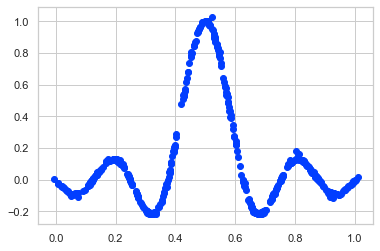

In [24]:
plt.scatter(z3[:,0],z3[:,1])